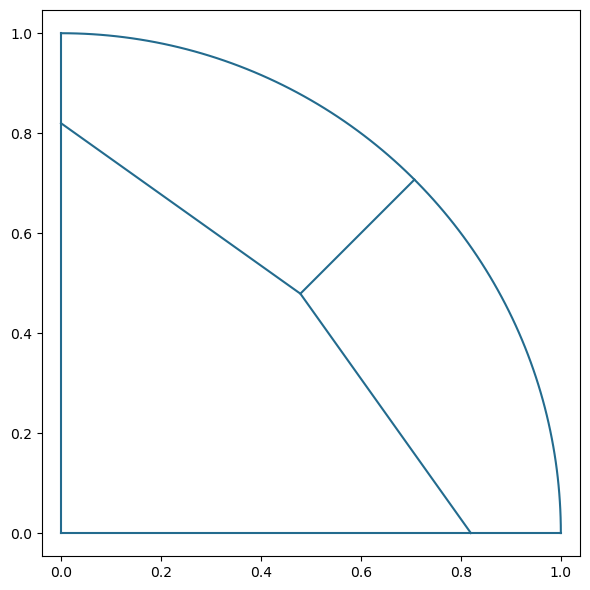

In [1]:
import numpy as np
import matplotlib.pyplot as plt

a = 0.82
b = np.pi/8/np.sin(np.pi/4)/a

theta = np.linspace(0, np.pi/2, 100)
circle = np.stack([np.cos(theta), np.sin(theta)]).T

p = np.array([[a, 0],
              [b*np.sin(np.pi/4), b*np.cos(np.pi/4)],
              [0, a]])

fig = plt.figure(figsize=(6,6))
plt.plot(circle[:,0], circle[:,1], '#236B8E')
plt.plot(np.array([0.0, 1.0]), np.array([0.0, 0.0]), '#236B8E')
plt.plot(np.array([0.0, 0.0]), np.array([0.0, 1.0]), '#236B8E')
plt.plot(p[:,0], p[:,1], '#236B8E')
plt.plot(np.array([p[1,0], np.cos(np.pi/4)]), np.array([p[1,1], np.sin(np.pi/4)]), '#236B8E')
plt.axis('equal')
plt.tight_layout()

In [21]:
np.array([162,220,255])/255

array([0.63529412, 0.8627451 , 1.        ])

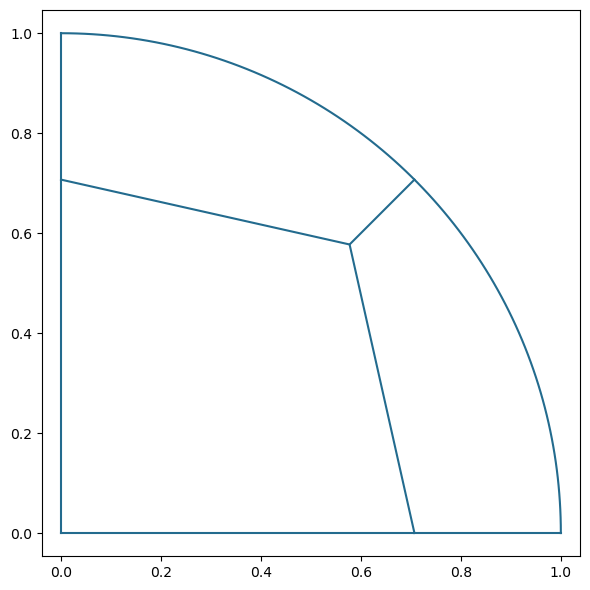

In [2]:
import numpy as np
import matplotlib.pyplot as plt

a = 1/np.sqrt(2)
b = np.sqrt(2)/np.sqrt(3)

theta = np.linspace(0, np.pi/2, 100)
circle = np.stack([np.cos(theta), np.sin(theta)]).T

p = np.array([[a, 0],
              [b*np.sin(np.pi/4), b*np.cos(np.pi/4)],
              [0, a]])

fig = plt.figure(figsize=(6,6))
plt.plot(circle[:,0], circle[:,1], '#236B8E')
plt.plot(np.array([0.0, 1.0]), np.array([0.0, 0.0]), '#236B8E')
plt.plot(np.array([0.0, 0.0]), np.array([0.0, 1.0]), '#236B8E')
plt.plot(p[:,0], p[:,1], '#236B8E')
plt.plot(np.array([p[1,0], np.cos(np.pi/4)]), np.array([p[1,1], np.sin(np.pi/4)]), '#236B8E')
plt.axis('equal')
plt.tight_layout()

In [3]:
import numpy as np

np.linspace(0.0, 1.0, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

/home/box/anaconda3/envs/py310/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


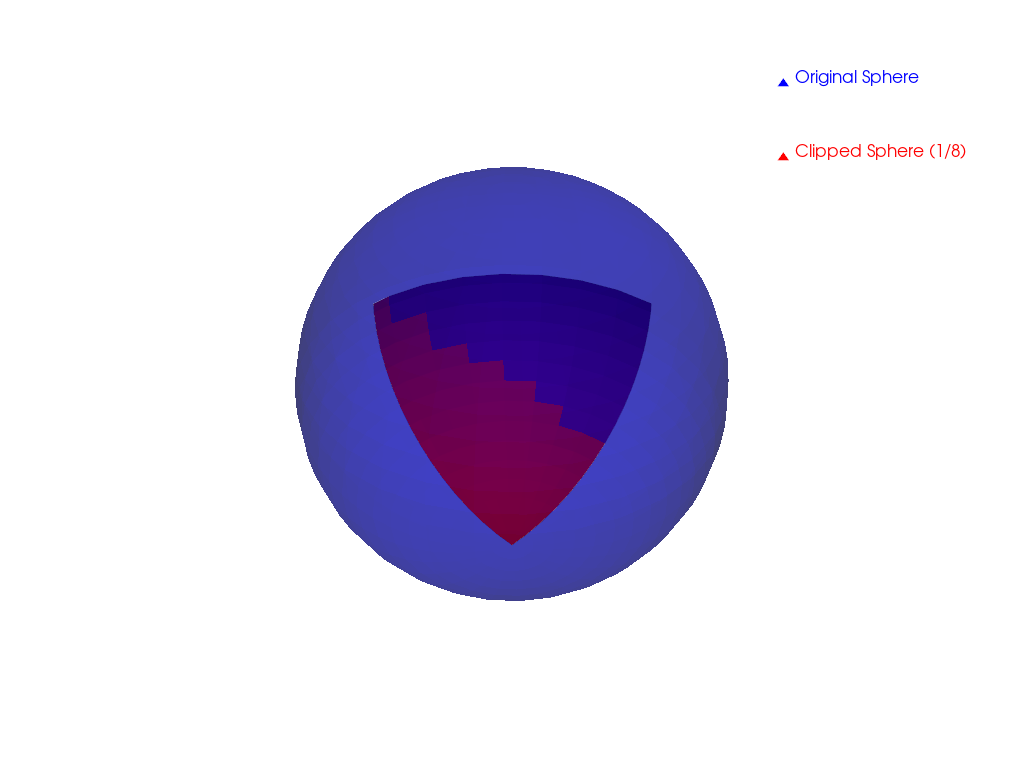

In [5]:
import pyvista as pv
import numpy as np

# 创建一个球体
sphere = pv.Sphere(radius=1.0, center=(0, 0, 0), theta_resolution=30, phi_resolution=30)

# 定义切平面
# 1. 通过 x=0 平面切
# 2. 通过 y=0 平面切
# 3. 通过 z=0 平面切
# 4. 通过 x=0, y=0, z=0 平面切

# 通过 x=0 平面切
clipped_sphere_1 = sphere.clip('x', origin=(0, 0, 0))

# 通过 y=0 平面切
clipped_sphere_2 = clipped_sphere_1.clip('y', origin=(0, 0, 0))

# 通过 z=0 平面切
clipped_sphere_3 = clipped_sphere_2.clip('z', origin=(0, 0, 0))

# 可视化结果
p = pv.Plotter()
p.add_mesh(sphere, color='blue', opacity=0.5, label='Original Sphere')
p.add_mesh(clipped_sphere_3, color='red', label='Clipped Sphere (1/8)')
p.add_legend()
p.show()

In [6]:
np.pi/6

0.5235987755982988

In [11]:
11831/16348

0.7236970883288476

In [17]:
a = np.array([1,2,3])
b = np.array([3,4,5])
np.stack((a,b))

array([[1, 2, 3],
       [3, 4, 5]])

In [ ]:
import numpy as np
import pyshtools as pysh

# 生成示例数据
nlat, nlon = 360, 720  # 纬度和经度的网格点数
lats = np.linspace(90, -90, nlat)  # 纬度从90到-90
lons = np.linspace(0, 360, nlon, endpoint=False)  # 经度从0到360
lons, lats = np.meshgrid(lons, lats)

print(lons.shape, lats.shape)

# 生成一些示例数据（例如，球面上的温度分布）
# data = 10 * np.sin(np.deg2rad(lats)) + 5 * np.cos(2 * np.deg2rad(lons))
data = np.ones_like(lons)
# print(data.shape)

# 球谐变换
coeffs = pysh.expand.SHExpandDH(data, sampling=2, lmax_calc=160)
print(coeffs.shape)

# 计算角功率谱， angular power spectra
power_spectrum = pysh.spectralanalysis.spectrum(coeffs)

# 绘制功率谱
degrees = np.arange(len(power_spectrum))
plt.plot(degrees, power_spectrum)
plt.xlabel('Degree l')
plt.ylabel('Power')
plt.title('Power Spectrum')
plt.show()

In [2]:
205/255

0.803921568627451

In [ ]:
def unique_with_tolerance(arr, tol):
    """
    在给定的误差范围内找出数组中的唯一元素。

    参数:
    arr (numpy.ndarray): 输入数组。
    tol (float): 允许的误差范围。

    返回:
    numpy.ndarray: 包含唯一元素的数组。
    """
    if len(arr) == 0:
        return np.array([])

    # 对数组进行排序
    sorted_arr = np.sort(arr)
    
    # 初始化结果数组和索引数组
    unique_elements = [sorted_arr[0]]
    indices = [0]

    # 遍历排序后的数组
    for i in range(1, len(sorted_arr)):
        if abs(sorted_arr[i] - unique_elements[-1]) > tol:
            # 如果当前元素与上一个唯一元素的差值大于误差范围，则将其视为新的唯一元素
            unique_elements.append(sorted_arr[i])
            indices.append(i)

    # 使用索引数组从原始数组中提取唯一元素（如果需要）
    # unique_arr_from_original = arr[np.array(indices)]

    return np.array(unique_elements)

In [ ]:
theta_u = unique_with_tolerance(theta, tol=1.23e-6)
print(theta_u.shape)

In [ ]:
40962/2

In [ ]:
import numpy as np
import pyshtools as pysh
import trimesh
import matplotlib.pyplot as plt

sphere_cvt = trimesh.load('/media/box/Elements/Exp/HCPSOTS/sphere_cvt0.obj')
points_xyz = np.array(sphere_cvt.vertices)  # radius = 1
print(points_xyz.shape)

x = points_xyz[:, 0]
y = points_xyz[:, 1]
z = points_xyz[:, 2]

# convert to spherical coordinates
phi = np.arctan2(y, x)  # in radians
phi = np.mod(phi + 2 * np.pi, 2 * np.pi)
theta = np.arccos(z)  # in radians

lons = phi.astype(np.float64)
lats = theta.astype(np.float64)

lon_grid, lat_grid = np.meshgrid(lons, lats)
values = np.ones_like(lon_grid)
print(values.shape)

# # 进行球谐变换
# coeffs = pysh.expand.SHExpandLSQ(values, lon_grid, lat_grid, lmax=20)
# print(coeffs[0].shape)

In [ ]:
coeffs[0].shape

In [ ]:
# 计算角功率谱， angular power spectra
angular_power_spectrum = pysh.spectralanalysis.spectrum(coeffs[0])

# 绘制功率谱
degrees = np.arange(len(angular_power_spectrum))
plt.plot(degrees, angular_power_spectrum)
plt.xlabel('Degree l')
plt.ylabel('Power')
plt.title('Power Spectrum')
plt.show()

In [ ]:
已知球面上的若干离散点坐标xyz，用pyshtools计算角功率谱，画出频谱图，横坐标为归一化的频率

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pyshtools.shclasses import SHGrid, SHCoeffs
from scipy.interpolate import griddata

sphere_cvt = trimesh.load('/media/box/Elements/Exp/HCPSOTS/sphere_cvt0.obj')
points_xyz = np.array(sphere_cvt.vertices)  # radius = 1

values = np.ones(points_xyz.shape[0])  

# 将笛卡尔坐标转换为球坐标（经度、纬度）
def cart2sph(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    phi = np.arctan2(y, x)  # 经度
    theta = np.arccos(z / r)  # 纬度（与地理坐标的纬度相反）
    return phi, np.pi/2 - theta  # 转换为地理坐标系的纬度

phi, theta = cart2sph(points_xyz[:, 0], points_xyz[:, 1], points_xyz[:, 2])
print(phi.shape, theta.shape)

# 创建规则的球面网格
nlat, nlon = 180, 360  # 网格分辨率
lat = np.linspace(-np.pi/2, np.pi/2, nlat)
lon = np.linspace(0, 2*np.pi, nlon, endpoint=False)
lat, lon = np.meshgrid(lat, lon)
lat = lat.flatten()
lon = lon.flatten()

print(lon.shape, lat.shape)

# 使用scipy的griddata进行插值
# grid_values = griddata((phi, theta), values, (lon, lat), method='linear')
grid_values = np.ones_like(lat)
# print(grid_values)

# 创建SHGrid实例
grid = SHGrid.from_array(grid_values.reshape(nlat, nlon), units='radians')

# 计算球谐系数
lmax = 80  # 最大球谐阶数
coeffs = pysh.expand.SHExpandDH(grid_values.reshape(nlat, nlon), sampling=2, lmax_calc=lmax)

# 计算角功率谱
power_spectrum = pysh.spectralanalysis.spectrum(coeffs)


# 归一化频率
degrees = np.arange(len(power_spectrum))
normalized_frequency = degrees / lmax


# 绘制频谱图
plt.figure(figsize=(10, 6))
plt.plot(normalized_frequency, power_spectrum, marker='o')
plt.xlabel('Normalized Frequency')
plt.ylabel('Power')
plt.title('Angular Power Spectrum')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sph_harm

# 生成球面上的离散点
def generate_sphere_points(n):
    indices = np.arange(0, n, dtype=float) + 0.5
    phi = np.arccos(1 - 2 * indices / n)
    theta = np.pi * (1 + 5**0.5) * indices
    return phi, theta

# 定义球面上的函数
def f(theta, phi):
    # 这里定义一个简单的球面上的函数，例如一个高斯函数
    return 1
    # return np.exp(-((theta - np.pi/2)**2 + (phi - np.pi)**2) / 0.1**2)

# 计算球谐变换的系数
def compute_discrete_spherical_harmonic_coefficients(f, phi, theta, l_max):
    n = len(phi)
    coefficients = {}
    for l in range(l_max + 1):
        for m in range(-l, l + 1):
            Y_lm = sph_harm(m, l, theta, phi)
            coefficients[(l, m)] = np.sum(f(phi, theta) * np.conj(Y_lm)) / n
    return coefficients

# 生成离散点
n = 3000  # 离散点的数量
phi, theta = generate_sphere_points(n)
print(phi.shape, theta.shape)

# 计算系数
l_max = 50  # 最大阶数
coefficients = compute_discrete_spherical_harmonic_coefficients(f, phi, theta, l_max)
print(coefficients.shape)
# 计算角功率频谱
power_spectrum = np.zeros(l_max + 1)
for l in range(l_max + 1):
    for m in range(-l, l + 1):
        power_spectrum[l] += np.abs(coefficients[(l, m)])**2

# 显示角功率频谱
plt.figure(figsize=(10, 6))
plt.plot(np.arange(l_max + 1), power_spectrum, marker='o', linestyle='-', color='blue')
plt.title("Angular Power Spectrum")
plt.xlabel("Degree (l)")
plt.ylabel("Power")
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import trimesh
from scipy.special import sph_harm
import matplotlib.pyplot as plt
import cmath


sphere_cvt = trimesh.load('/media/box/Elements/Exp/HCPSOTS/sphere_cvt0.obj')
points_xyz = np.array(sphere_cvt.vertices)  # radius = 1
print(points_xyz.shape)
N = points_xyz.shape[0]

x = points_xyz[:, 0]
y = points_xyz[:, 1]
z = points_xyz[:, 2]

# convert to spherical coordinates
phi = np.arctan2(y, x)  # in radians
phi = np.mod(phi + 2 * np.pi, 2 * np.pi)   # [0, 2pi]
theta = np.arccos(z)   # in radians, [-pi/2, pi/2]

lonlat = np.stack([phi, theta], axis=1)  # (N, 2)

theta, phi = np.meshgrid(theta, phi)

# 示例数据：随机复数数据
# data = np.exp(1j * np.random.rand(n_phi, n_theta))
# data = np.exp(1j * np.zeros((n_phi, n_theta)))

data = np.zeros((N, N))
for pt in lonlat:
    coords = int(pt[0]), int(pt[1])
    data[coords] = 1e5

# 初始化复数球谐系数矩阵
l_max = 15  # 最大阶数
num_coeffs = (l_max + 1) ** 2
coeffs = np.zeros(num_coeffs, dtype=complex)

# 计算复数球谐系数
for l in range(l_max + 1):
    for m in range(-l, l + 1):
        index = int(np.sum(l <= np.arange(l_max + 1))) + m + l
        Y_lm = sph_harm(m, l, theta, phi)
        coeffs[index] = np.sum(data.conj() * Y_lm) * (2 * l + 1) / (4 * np.pi)

# 计算角功率频谱
# power_spectrum = np.abs(coeffs) 
l_values = np.arange(num_coeffs)
aps = np.abs(np.array([cmath.phase(c) for c in coeffs]))


# 绘制角功率频谱图
plt.figure(figsize=(10, 6))
plt.plot(l_values, aps, linestyle='-', color='b')
plt.xlabel('Degree $l$')
plt.ylabel('Angular Power Spectrum')
plt.title('Angular Power Spectrum of Spherical Harmonic Coefficients')
plt.grid(True)
plt.show()

In [ ]:
 np.random.uniform()

In [ ]:
import pyshtools as pysh
import numpy as np
import trimesh
import matplotlib.pyplot as plt

# 假设你有一个定义在球面上的函数数据，这里我们创建一个简单的示例数据
# lmax 是球谐变换的最大阶数，它决定了频谱的分辨率
lmax = 1196

sphere_cvt = trimesh.load('/media/box/Elements/Exp/HCPSOTS/sphere_cvt0.obj')
points_xyz = np.array(sphere_cvt.vertices)  # radius = 1
print(points_xyz.shape)
N = points_xyz.shape[0]

x = points_xyz[:, 0]
y = points_xyz[:, 1]
z = points_xyz[:, 2]

# convert to spherical coordinates
phi = np.arctan2(y, x)  # in radians
phi = np.mod(phi + 2 * np.pi, 2 * np.pi)   # [0, 2pi]
theta = np.arccos(z)   # in radians, [-pi/2, pi/2]

lonlat = np.stack([phi, theta], axis=1)  # (N, 2)
data = np.zeros((N, N))
for pt in lonlat:
    coords = int(pt[0]), int(pt[1])
    data[coords] = 1e5


grid = pysh.SHGrid.from_array(data, grid='DH')

# 将网格数据转换为球谐系数
coeffs = grid.expand(lmax_calc=lmax, normalization='schmidt')
print(coeffs.coeffs.shape)

# # 现在 coeffs 包含了球面上数据点的频谱
# # coeffs.coeffs 是一个二维数组，其中每一行对应一个球谐阶数 l，每一列对应一个球谐阶数 m
# # coeffs.coeffs[l, m] 就是对应于 l, m 的球谐系数

# # # 打印频谱信息
# # for l in range(lmax+1):
# #     for m in range(-l, l+1):
# #         print(f"l={l}, m={m}: {coeffs.coeffs[0, l, m+l]}")

# # 用球谐变换计算球面上的数据点的复数球谐系数,并绘制出角功率频谱图

# 计算角功率频谱
power_spectrum = coeffs.spectrum()

plt.figure(figsize=(10, 6))
plt.plot(np.arange(lmax + 1), power_spectrum, linestyle='-', color='b')
plt.xlabel('Normalized Frequencies')
plt.ylabel('Angular Power Spectrum')

# plt.title('Angular Power Spectrum')
plt.grid(True, which='both', ls='-.')
plt.show()

In [ ]:
coeffs.coeffs[0][1,:10]

In [ ]:
coeffs.coeffs[1]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from blue_noise import FastPoissonDisk
from scipy.fftpack import fft2, fftshift


# 生成蓝噪采样点
width, height = 100, 100  
ppd = FastPoissonDisk(width, height, radius=2.0)
points = ppd.samples()
points = np.array(points)
print(points.shape)

print(points[:,0].min(), points[:,0].max())

# plt.figure(figsize=(8,8))
# plt.scatter(points[:,0], points[:,1], s=1)
# plt.axis('equal')
# plt.axis('off')
# plt.tight_layout()
# plt.show()


In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(points[:,0], points[:,1], s=0.1)
plt.axis('equal')
plt.axis('off')
plt.tight_layout()
plt.show()

np.savez('/media/box/Elements/Exp/HCPSOTS/out/blue_points_w100_h100.npz', blue_points=points)


In [ ]:
from scipy.fftpack import fft2, fftshift
import random

# 计算频谱
def compute_spectrum(points, width, height, M=2):
    image = np.zeros((height*M, width*M))
    # 将点放置在图像中
    for pt in points:
        coords = int(pt[1] * M), int(pt[0] * M)
        image[coords] = 1.0
    
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    spectrum = np.log(np.abs(fshift))
    
    return spectrum

pts = np.load('/media/box/Elements/Exp/NEOTS/out/blue_points_w100_h100.npz')['blue_points']
print(pts.shape)


# 计算频谱
spectrum = compute_spectrum(pts, width, height)
print(spectrum.shape)

# 显示频谱
plt.figure(figsize=(10, 8))
# plt.imshow(spectrum, cmap='gray', extent=[-width/2, width/2, -height/2, height/2])
plt.imshow(spectrum, cmap='gray')
plt.colorbar(label='Log Magnitude')
plt.title("Blue Noise Sampling Spectrum")
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, fftshift

# 生成一个二维信号，例如一个具有周期性结构的图像
np.random.seed(0)
rows, cols = 128, 128
image = np.zeros((rows, cols))
# 创建一个简单的周期性条纹模式
for i in range(rows):
    for j in range(cols):
        image[i, j] = np.sin(2 * np.pi * i / 32) * np.sin(2 * np.pi * j / 32)

# 添加一些噪声
image += np.random.normal(0, 0.1, (rows, cols))

# 计算二维FFT
f = fft2(image)
fshift = fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift))

# 绘制原始图像
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.colorbar()

# 绘制幅度谱
plt.subplot(1, 2, 2)
plt.title('Magnitude Spectrum')
plt.imshow(magnitude_spectrum, cmap='gray')
plt.colorbar()

plt.tight_layout()
plt.show()

In [ ]:
print(pts.shape)
diff_0 = np.diff(np.sort(pts[:,0]))
print(diff_0.shape)
print(np.abs(diff_0).min(), np.abs(diff_0).max())
print(diff_0.mean(), diff_0.var())

In [ ]:
diff_1 = np.diff(np.sort(pts[:,1]))
print(diff_1.shape)
print(np.abs(diff_1).min(), np.abs(diff_1).max())
print(diff_1.mean(), diff_1.var())

In [ ]:
a = np.random.normal(size=(40000,))
diff_a = np.diff(a)
print(diff_a.mean(), diff_a.var())

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pyshtools as pysh
from poisson_disc import *


pts = Bridson_sampling(dims=np.array([60, 60]), radius=1.0, hypersphere_sample=hypersphere_surface_sample)
print(pts.shape)

pts = pts / np.linalg.norm(pts, axis=1, keepdims=True)


In [ ]:
plt.scatter(pts[:,0], pts[:,1], s=0.1)

pts[:,1].max()

(2562, 3)
(800, 1600)


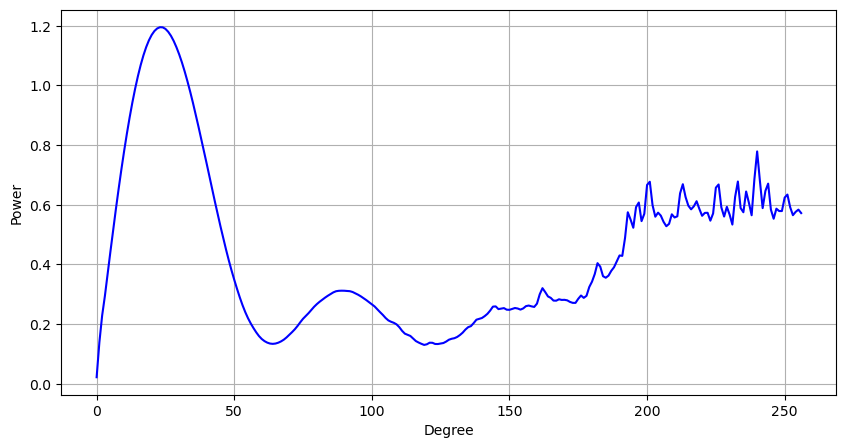

In [1]:
import numpy as np
import trimesh
import matplotlib.pyplot as plt
import pyshtools as pysh
import polyscope as ps

sphere_cvt = trimesh.load('/media/box/Elements/Exp/HCPSOTS/sphere_cvt0.obj')
pts_xyz = np.array(sphere_cvt.vertices)  # radius = 1
print(pts_xyz.shape)

pts_xyz = np.loadtxt('/media/box/Elements/Exp/sphere-code/results/pointsets-sphere-poissondisk/2024-12-31/datafiles/samples-poissondisk-n10000.txt')

# 将球面上的点转换为经纬度
def points_to_lat_lon(points):
    lats = np.degrees(np.arcsin(points[:, 2]))
    lons = np.degrees(np.arctan2(points[:, 1], points[:, 0]))
    lons = np.mod(lons + 2 * np.pi, 2 * np.pi)   # [0, 2pi]
    return lats, lons

# 将数据转换为网格
def data_to_grid(lats, lons, nlat=800, nlon=1600):
    grid = np.zeros((nlat, nlon))
    for lat, lon in zip(lats, lons):
        ilat = int((lat + 90) / 180 * (nlat - 1))
        ilon = int(lon / 360 * (nlon - 1))
        grid[ilat, ilon] = 20.0
    return grid

# 计算球谐变换
def compute_sht(grid, lmax):
    coeffs = grid.expand(lmax_calc=lmax, normalization='schmidt')
    # 创建一个SHT对象
    clm = pysh.SHCoeffs.from_array(coeffs.coeffs, lmax=lmax, normalization='4pi', csphase=1)
    # clm = pysh.SHCoeffs.from_array(coeffs.coeffs)
    return clm

# 绘制角功率频谱图
def plot_power_spectrum(power_spectrum):
    degrees = np.arange(len(power_spectrum))
    plt.figure(figsize=(10, 5))
    plt.plot(degrees, power_spectrum, linestyle='-', color='b')
    # plt.title('Angular Power Spectrum')
    plt.xlabel('Degree')
    plt.ylabel('Power')
    plt.grid(True)
    plt.show()


# pts_xyz = np.random.uniform(-1, 1, (12000, 3))
# pts_xyz = pts_xyz / np.linalg.norm(pts_xyz, axis=1, keepdims=True)


def generate_fibonacci_points(n):
    # 黄金角（以弧度为单位）
    golden_angle = np.pi * (3 - np.sqrt(5))
    # 生成点
    points = np.zeros((n, 3))
    for i in range(n):
        # 计算纬度和经度
        lat = np.arcsin(1 - 2 * (i + 0.5) / n)
        lon = golden_angle * i
        # 转换为笛卡尔坐标
        x = np.cos(lon) * np.cos(lat)
        y = np.sin(lon) * np.cos(lat)
        z = np.sin(lat)
        points[i] = [x, y, z]
    return points

# pts_xyz = generate_fibonacci_points(10000)

# ps.init()
# ps.set_ground_plane_mode("shadow_only")  
# # ps.set_ground_plane_mode("tile")  
# ps.set_shadow_darkness(0.95)

# ps.register_surface_mesh(
#     "sphere", 
#     sphere_cvt.vertices, 
#     sphere_cvt.faces,
#     color=(0.275966, 0.792482, 0.8),
#     # enabled=True,
#     # edge_color=(0.0, 0.0, 0.0),
#     # edge_width=1.0,
#     # smooth_shade=True,
#     transparency=1.0
#     )
# ps.register_point_cloud(
#     "points", 
#     # points_xyz,
#     pts_xyz,
#     color=(1.0, 0.0, 0.0),
#     enabled=True,
#     radius=0.002,
#     transparency=1.0
#     )
# ps.show()


# 将点转换为经纬度
lats, lons = points_to_lat_lon(pts_xyz)

# lats = np.degrees(np.random.uniform(-np.pi/2, np.pi/2, 800))
# lons = np.degrees(np.random.uniform(0, 2*np.pi, 800))

# 将数据转换为网格
grid = data_to_grid(lats, lons)
print(grid.shape)
grid = pysh.SHGrid.from_array(grid, grid='DH')


# 计算球谐变换
lmax = 256  # 最大球谐阶数
clm = compute_sht(grid, lmax)

# 获取复数球谐系数
coeffs = clm.coeffs

# 计算角功率频谱
power_spectrum = clm.spectrum()

# 绘制角功率频谱图
plot_power_spectrum(power_spectrum)

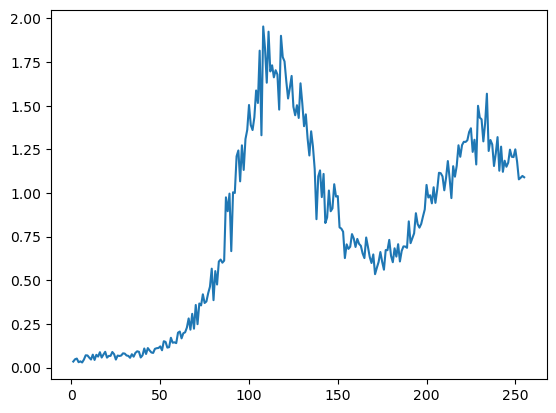

In [7]:
poisson_disk_spectrum = np.loadtxt('/media/box/Elements/Exp/sphere-code/results/powspec-sphere-poissondisk-n3000/2024-12-31/datafiles/powspec-sphere-poissondisk-n3000.txt')

x = poisson_disk_spectrum[1:, 0]
y = poisson_disk_spectrum[1:, 1]
plt.plot(x, y)

In [2]:
import numpy as np

np.array([227, 237, 237])/255

array([0.89019608, 0.92941176, 0.92941176])